# Import library and process dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats
%matplotlib inline

In [2]:
pd.options.display.max_colwidth = 100 #show full string value

In [3]:
activity = pd.read_csv('~/Python_data_analytics/einstein/analysis/activity1.csv', sep=",")
activity = activity.drop(activity.index[140608])

In [4]:
from pm4py.objects.conversion.log import factory as conversion_factory
eventlog = conversion_factory.apply(activity)


/home/tai/anaconda3/lib/python3.7/site-packages/pm4py/visualization/graphs/versions/cases.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/tai/anaconda3/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/tai/anaconda3/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/tai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/tai/anaconda3/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/tai/anaconda3/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 505, in st

In [5]:
activity = activity.sort_values(by=['case:concept:name','time:timestamp'])


In [6]:
activity['case'] = activity['case:concept:name']
activity['activity'] = activity['concept:instance']
eventLog = activity.set_index(['case', 'activity'])

In [7]:
#eventLog = eventLog.loc[(eventLog['time:timestamp'] >= '2018-09-20') and eventLog['time:timestamp'] <= '2018-12-31')]
eventLog.sort_values(by=['case:concept:name','time:timestamp'])
#eventLog.to_csv('eventLog')
eventLog

case:concept:name  \
case                                                      activity                                                                
2018-09-20-u-00b8c129ae34eedef4311450577776a7a7f94c81-1   load          2018-09-20-u-00b8c129ae34eedef4311450577776a7a7f94c81-1   
                                                          focus         2018-09-20-u-00b8c129ae34eedef4311450577776a7a7f94c81-1   
                                                          scroll        2018-09-20-u-00b8c129ae34eedef4311450577776a7a7f94c81-1   
                                                          scroll        2018-09-20-u-00b8c129ae34eedef4311450577776a7a7f94c81-1   
                                                          scroll        2018-09-20-u-00b8c129ae34eedef4311450577776a7a7f94c81-1   
                                                          scroll        2018-09-20-u-00b8c129ae34eedef4311450577776a7a7f94c81-1   
                                                          scroll        2018-09-20-u-00b8c129ae34eedef4311450577776a7a7f94c81-1   
                                                          scroll        2018-09-20-u-00b8c129ae34eedef4311450577776a7a7f94c81-1   
                                                          scroll        2018-09-20-u-00b8c129ae34eedef4311450577776a7a7f94c81-1   
                                                          scroll        2018-09-20-u-00b8c129ae34eedef4311450577776a7a7f94c81-1   
                                                          scroll        2018-09-20-u-00b8c129ae34eedef4311450577776a7a7f94c81-1   
                                                          scroll        2018-09-20-u-00b8c129ae34eedef4311450577776a7a7f94c81-1   
                                                          scroll        2018-09-20-u-00b8c129ae34eedef4311450577776a7a7f94c81-1   
                                                          scroll        2018-09-20-u-00b8c129ae34eedef4311450577776a7a7f94c81-1   
                                                          blur          2018-09-20-u-00b8c129ae34eedef4311450577776a7a7f94c81-1   
                                                          focus         2018-09-20-u-00b8c129ae34eedef4311450577776a7a7f94c81-1   
                                                          scroll        2018-09-20-u-00b8c129ae34eedef4311450577776a7a7f94c81-1   
                                                          scroll        2018-09-20-u-00b8c129ae34eedef4311450577776a7a7f94c81-1   
                                                          scroll        2018-09-20-u-00b8c129ae34eedef4311450577776a7a7f94c81-1   
                                                          scroll        2018-09-20-u-00b8c129ae34eedef4311450577776a7a7f94c81-1   
2018-09-20-u-05ee904af8d6c52473f2513f305e6cb86da4f215-1   load          2018-09-20-u-05ee904af8d6c52473f2513f305e6cb86da4f215-1   
                                                          scroll        2018-09-20-u-05ee904af8d6c52473f2513f305e6cb86da4f215-1   
                                                          scroll        2018-09-20-u-05ee904af8d6c52473f2513f305e6cb86da4f215-1   
                                                          scroll        2018-09-20-u-05ee904af8d6c52473f2513f305e6cb86da4f215-1   
                                                          scroll        2018-09-20-u-05ee904af8d6c52473f2513f305e6cb86da4f215-1   
                                                          scroll        2018-09-20-u-05ee904af8d6c52473f2513f305e6cb86da4f215-1   
                                                          click-0       2018-09-20-u-05ee904af8d6c52473f2513f305e6cb86da4f215-1   
                                                          scroll        2018-09-20-u-05ee904af8d6c52473f2513f305e6cb86da4f215-1   
                                                          hashchange    2018-09-20-u-05ee904af8d6c52473f2513f305e6cb86da4f215-1   
                                                 

In [8]:
originalElements = ['load','scroll','blur','focus','unload','hashchange','click-0','selection','click-2',
                    'click-1','click-3']

columns = []
columns.append('case')
columns.append('startDate')
columns.append('endDate')
columns.append('user')

for i in originalElements:
    for j in originalElements:
        txt = i + '-' + j
        columns.append(txt)
columns = list(dict.fromkeys(columns))



In [165]:
a = []
b = {'a': 5}
c = {'b': 5}
a.append(b)
a.append(c)

haha = pd.DataFrame(a, columns=['a','b'])
haha

,a,b
0,5.0,NaN
1,NaN,5.0


In [9]:
allRow = []
for index,row in eventLog.groupby(level=0):
    newRow = {}
    splitIndex = index.split("-")

    newRow['user'] = splitIndex[3]+'-'+splitIndex[4]
    newRow['startDate'] = row['time:timestamp'][0]
    newRow['endDate'] = row['time:timestamp'][len(row)-1]
    newRow['case'] = index
             
    for i in range(len(row['concept:instance'])-1):
        key = row['concept:instance'][i]+'-'+row['concept:instance'][i+1]
        if key in columns:
            if key not in newRow:
                newRow[key] = 1
            else:
                newRow[key] = newRow[key] + 1               
    allRow.append(newRow)

In [10]:
activityVariance = pd.DataFrame(allRow,columns=columns)

In [14]:
len(activityVariance.columns)

125

In [15]:
activityVariance = activityVariance.fillna(0)
activityVariance.to_csv('activityVariance1.csv')

In [3]:
activityVariance = pd.read_csv('activityVariance.csv')

In [5]:
eventLog = pd.read_csv('eventLog')

In [7]:
exp = activityVariance
exp['startDate'] = pd.to_datetime(exp.startDate)
exp['endDate'] = pd.to_datetime(exp.endDate)
exp = exp.set_index('startDate')

In [8]:
exp = exp.groupby([pd.Grouper(freq='12W'),pd.Grouper(key='user')]).sum()

In [9]:
originalElements = ['load','scroll','blur','focus','unload']

columns1 = []

for i in originalElements:
    for j in originalElements:
        txt = i + '-' + j
        columns1.append(txt)
columns1 = list(dict.fromkeys(columns1))

In [10]:
exp = exp[columns1]

In [32]:
exp

load-load  load-scroll  \
startDate  user                                                                 
2018-09-23 u-00b8c129ae34eedef4311450577776a7a7f94c81        0.0          1.0   
           u-05ee904af8d6c52473f2513f305e6cb86da4f215        0.0          1.0   
           u-324f406a95a0a1aaaf4eed613e7d20f309f4f44a        0.0          1.0   
           u-3856d9bc34eaf4614aaabf5da06bc4b76ead03b5        0.0          0.0   
           u-4db02b0448c341ade9f68eca45815a048f245cb4        0.0          1.0   
           u-5fd04cf5a4e76237f999898dd79eb76774c3b5c0        0.0          1.0   
           u-65085e365e2b2d05d658cdff5baa4976241f2b64        0.0          1.0   
           u-6c632d9da15617642f005d1e287552830b0c17c2        0.0          2.0   
           u-754db32a2d33a01f54f496daa881090a2da30e20        0.0          1.0   
           u-a57f3efbe17b132fc795b501b09b0e99caf1c100        0.0          1.0   
           u-acb395c804620f790f5c1b4215407d772e3c588e        0.0          1.0   
           u-adb52303f46ab4dd79d0c6eac9c6548957ede3d3        0.0          0.0   
           u-b54c732cc913e0ecaaaccf4eeb9119fdf5dc5e4c        0.0          1.0   
           u-dc0210981839455ebc6f116d41021c2538805d73        0.0          1.0   
           u-df53bc3b6a36d96f0359387049f89b6987b0cf83        0.0          5.0   
           u-e61556df68a642e529e9b5435318d7dc916402f7        0.0          2.0   
           u-e6ca22ef2b9a3ca5b60f0a794990d258bdd2d4f8        0.0          1.0   
           u-ea9543eaac6f36fc0c2e54b5c7f2724957af0e4d        0.0          0.0   
           u-ec28731615818f2e040cb894495344b1e5537228        0.0          4.0   
           u-f36d0dcfcb3b05807c144548e64d26b8c2c5ece1        0.0          1.0   
           u-0f6f96c1141c6883b91dfdbec40fdcfb987ce46c        0.0          2.0   
           u-386b3bbf27388b41944ac45ed25743bc8a59462e        0.0          1.0   
           u-7a44ef08583e04578007c82ff00ac3daae851885        0.0          1.0   
           u-8e4c336e7be8cb98ebe9494b85a99c1316d1af97        0.0          2.0   
           u-b306f240e2ead9027945af3ecef38b31b484d3df        0.0          1.0   
           u-ed06a7f0214070d767a7001238172801aaf1482c        0.0          2.0   
           u-f1caaebe1f464f14ed7b8e0070fe903f648ab52f        0.0          1.0   
           u-728a80ca997570162350ffa36d5a171b4578455b        0.0          1.0   
           u-7aa67bbae734f83cd63784bc2844f62505e3e124        0.0          0.0   
           u-97b0dd5855fde85ffb6fa5a4112ecd9bb32a849c        0.0          1.0   
...                                                          ...          ...   
2019-06-02 u-55431ea31b9f0c36a2d8aeef035ddbcd5db5a2ea        0.0          1.0   
           u-699084d11897ded1631447af812f6ec966aafccf        0.0         15.0   
           u-7734e032173e983859b64a79622a34d210dbbd3b        0.0          0.0   
           u-7ca0d4403addb049e9ffe836952d9a32d97349b5        0.0         56.0   
           u-b66b8b853315dd23fa129c7d3c650af75ed95d2f        0.0          1.0   
           u-b9592a79c075db1e5a4b1f9966088febe774d079        0.0         12.0   
           u-ee3d6eb4568af183d0c38a7ec4c43bb702574fb3        0.0          2.0   
           u-ef30b13472aae5d51ccdd7e3126041cbc9078dec        0.0          1.0   
           u-fe2070a8946002c3042c8a724f14179d4065383a        0.0          4.0   
           u-348b3d68397d4ea68df85ec2ac15c19bba079e03        1.0          1.0   
           u-4ce00eb03cc7c61fe97fe9032e9b27a06e7d8642        0.0         26.0   
           u-7201cd3fbb7807daf5d9f70491ba5645157c08d0        0.0          2.0   
           u-89160ceb596ce9646838c7fe1d87d8344b74f174        0.0          1.0   
           u-8ba89712cd93778196cf990ec73fc71c497eff6e        0.0          0.0   
           u-ad2c6c4b4139b251bc973daa9ad8adbb9d30efa5        0.0         55.0   
           u-b5aadeb36fd65e56c321b706de24f46a7d480f0b        0.0          0.0   
           u-c3f75d6fa7feb2674cffc7d3a7371561c3cfe8cf        0.0          0.0   
     

In [24]:
dataUpload = pd.read_csv('~/Python_data_analytics/einstein/analysis/uploads1.csv', sep=",")
dataUpload['date'] = pd.to_datetime(dataUpload.date)
dataUpload = dataUpload.set_index('date')
dataUpload = dataUpload.sort_index()

In [25]:
uploadSumGroupedbyWeek = dataUpload.groupby([pd.Grouper(freq='12W'),pd.Grouper(key='user')]).sum()

In [26]:
#calculate the average mark of each student
filterSemester1 = uploadSumGroupedbyWeek.loc['2018-09-30']
filterSemester1['mark'] = filterSemester1['passed']/(filterSemester1['passed'] + filterSemester1['failed'])

/home/tai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
combinedActivityVariantMarkByWeek = pd.merge(exp,filterSemester1, left_on=exp.index, right_on=filterSemester1.index)    

In [21]:
combinedActivityVariantMarkByWeek = combinedActivityVariantMarkByWeek.set_index('key_0')

In [28]:
combinedActivityVariantMarkByWeek.index = pd.MultiIndex.from_tuples(combinedActivityVariantMarkByWeek['key_0'], names=('date', 'user')) 

In [30]:
combinedActivityVariantMarkByWeek.drop(['key_0'], axis = 1, inplace=True) 

In [31]:
combinedActivityVariantMarkByWeek

,,load-load,load-scroll,load-blur,load-focus,load-unload,scroll-load,scroll-scroll,scroll-blur,scroll-focus,scroll-unload,...,unload-scroll,unload-blur,unload-focus,unload-unload,correct,failed,passed,version,timeout,mark
date,user,,,,,,,,,,,,,,,,,,,,,


In [215]:
#based on percentile
   
excellentCohort = pd.DataFrame()
goodCohort = pd.DataFrame()
mediumCohort = pd.DataFrame()
badCohort = pd.DataFrame()

for index, weeklyData in combinedActivityVariantMarkByWeek.groupby(level=0):
    excellentPoint = 0.7 #np.percentile(weeklyData['mark'],75)
    goodPoint = 0.6 #np.percentile(weeklyData['mark'],50)
    mediumPoint = 0.5 #np.percentile(weeklyData['mark'],25)
    
    
    excellentCohort = pd.concat([excellentCohort,weeklyData.loc[weeklyData['mark'] >= excellentPoint]])
    goodCohort = pd.concat([goodCohort,weeklyData.loc[(weeklyData['mark'] < excellentPoint) & (weeklyData['mark'] >= goodPoint)]])
    mediumCohort = pd.concat([mediumCohort,weeklyData.loc[(weeklyData['mark'] < goodPoint) & (weeklyData['mark'] >= mediumPoint)]])
    badCohort = pd.concat([badCohort,weeklyData.loc[(weeklyData['mark'] < mediumPoint)]])

print('Excellent cohort:')
for i,row in excellentCohort.groupby(level=0):
    print(str(i) + ": " + str(len(row)))
print('Good cohort:')
for i,row in goodCohort.groupby(level=0):
    print(str(i) + ": " + str(len(row)))
print('Medium cohort:')
for i,row in mediumCohort.groupby(level=0):
    print(str(i) + ": " + str(len(row)))
print('Bad cohort:')
for i,row in badCohort.groupby(level=0):
    print(str(i) + ": " + str(len(row)))


Excellent cohort:
2018-09-30 00:00:00: 32
2018-10-07 00:00:00: 33
2018-10-14 00:00:00: 84
2018-10-21 00:00:00: 73
2018-10-28 00:00:00: 90
2018-11-04 00:00:00: 87
2018-11-11 00:00:00: 69
2018-11-18 00:00:00: 53
2018-11-25 00:00:00: 27
2018-12-02 00:00:00: 50
2018-12-09 00:00:00: 34
2018-12-16 00:00:00: 12
Good cohort:
2018-09-30 00:00:00: 40
2018-10-07 00:00:00: 38
2018-10-14 00:00:00: 23
2018-10-21 00:00:00: 16
2018-10-28 00:00:00: 17
2018-11-04 00:00:00: 23
2018-11-11 00:00:00: 19
2018-11-18 00:00:00: 27
2018-11-25 00:00:00: 37
2018-12-02 00:00:00: 32
2018-12-09 00:00:00: 29
2018-12-16 00:00:00: 20
Medium cohort:
2018-09-30 00:00:00: 26
2018-10-07 00:00:00: 33
2018-10-14 00:00:00: 5
2018-10-21 00:00:00: 18
2018-10-28 00:00:00: 8
2018-11-04 00:00:00: 6
2018-11-11 00:00:00: 17
2018-11-18 00:00:00: 19
2018-11-25 00:00:00: 32
2018-12-02 00:00:00: 19
2018-12-09 00:00:00: 23
2018-12-16 00:00:00: 23
Bad cohort:
2018-09-30 00:00:00: 17
2018-10-07 00:00:00: 17
2018-10-14 00:00:00: 11
2018-10-2

In [98]:
excellentCohort

load-load  load-scroll  \
date       user                                                                 
2018-09-30 u-3856d9bc34eaf4614aaabf5da06bc4b76ead03b5          1           11   
           u-65085e365e2b2d05d658cdff5baa4976241f2b64          0            7   
           u-ed06a7f0214070d767a7001238172801aaf1482c          0            2   
           u-2a9d9f9973b2ba3cccb39516a7129ffae2570826          0            1   
           u-136eeb428e0a35197b17c0c7431dadba82894e2f          0           36   
           u-19bad38d8231fe7f2fc601254aee8354cace7a43          0            8   
           u-9786ad882820a6eee8297d92296b7593b34c8db5          0            3   
           u-ac9ce7e1b54bc33c5d604145c9a80d4a59058a87          1            5   
           u-efe2fecfc722d35c2f64de01db5c615051aca17f          0            6   
           u-b9592a79c075db1e5a4b1f9966088febe774d079          5            5   
           u-e7b392ec667cd001708d728c9895eb5ba09b8182          0            0   
           u-ebf8de456119fe2253e37380ccf996f7cdf74027          0           11   
2018-10-07 u-f1caaebe1f464f14ed7b8e0070fe903f648ab52f          2           10   
           u-de562d78a7d56302eb46cbb28c29becf7a5bfc6a          8            5   
           u-e1076ce91272e220ebe134772bcd152be12cf045          0            6   
           u-e7b392ec667cd001708d728c9895eb5ba09b8182          0            8   
2018-10-14 u-05ee904af8d6c52473f2513f305e6cb86da4f215          0           39   
           u-324f406a95a0a1aaaf4eed613e7d20f309f4f44a          0           17   
           u-3856d9bc34eaf4614aaabf5da06bc4b76ead03b5          0           13   
           u-4db02b0448c341ade9f68eca45815a048f245cb4          0           12   
           u-5fd04cf5a4e76237f999898dd79eb76774c3b5c0          0            9   
           u-65085e365e2b2d05d658cdff5baa4976241f2b64          0           17   
           u-6c632d9da15617642f005d1e287552830b0c17c2          0           87   
           u-754db32a2d33a01f54f496daa881090a2da30e20          0           12   
           u-a57f3efbe17b132fc795b501b09b0e99caf1c100          0           32   
           u-acb395c804620f790f5c1b4215407d772e3c588e          0            7   
           u-df53bc3b6a36d96f0359387049f89b6987b0cf83          1           14   
           u-e61556df68a642e529e9b5435318d7dc916402f7          0            3   
           u-e6ca22ef2b9a3ca5b60f0a794990d258bdd2d4f8          0            7   
           u-f36d0dcfcb3b05807c144548e64d26b8c2c5ece1          0            2   
...                                                          ...          ...   
2018-10-21 u-fba7ecb85592d81991ca2d1211b4a7580deaa991          0            8   
           u-6bd655fe0a543f01398918dc68f35e4706c32e08          0            4   
           u-ce7f7e30c296d98959481b4c3dfb585f23b496f8          0            7   
           u-5d0d62c3b2fe654e00756741a406bfe86194dfb9          0            3   
           u-02166746e73d6094a83cd42464f81d823ea82974          0           19   
           u-02600f1c80c5a5ee06f48545b80de15533db6c64          0           16   
           u-114b810c95a5ebd746ed7b4ad73634929caa83d8          1           12   
           u-136eeb428e0a35197b17c0c7431dadba82894e2f          0           62   
           u-19bad38d8231fe7f2fc601254aee8354cace7a43          0            4   
           u-1c55f6657ae37a921ea1dab5bc82f48b14f1d225          0           20   
           u-5ec5c919ba436be85f8b4f8660c692101d7b8e00          0            7   
           u-72f4d01c6a1797c30bc2921217a5be13c3effad3          0           35   
           u-8ce3c26401ee00cae894e63689cbb18d3a4baaf4          0           46   
           u-9786ad882820a6eee8297d92296b7593b34c8db5          0            6   
           u-ac9ce7e1b54bc33c5d604145c9a80d4a59058a87          3            0   
           u-de562d78a7d56302eb46cbb28c29becf7a5bfc6a          0            1   
           u-e1e87f686c255d403fc5c81390e2406e0687cb0f          0            6   
     

In [216]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

loadingsArrayExcellentCohortArray = []
pcValueExcellentCohortArray = []
pca = PCA(n_components=2)

for i,weeklyActivity in excellentCohort.groupby(level=0):
    temp = weeklyActivity.drop(['correct','failed','passed','version','timeout',
                                'mark'], axis=1)    
    x = temp.values    
    #x_adjust = x - np.mean(x)
    scaler.fit(x)
    x = scaler.transform(x)
    pca.fit(x)
    # transformed value to array
    transformed_value = pca.fit_transform(x)
    countValue = 0
    for t in transformed_value:
        row_list = []
        row_list.append(i)
        countValue1 = 0
        for u,tp in weeklyActivity.groupby(level=1):
            if countValue == countValue1:
                row_list.append(u)
            countValue1 = countValue1 + 1
        for v in t:
            row_list.append(v)
        pcValueExcellentCohortArray.append(row_list)
        countValue = countValue + 1
    
    count = 1    
    # eigenvectors/loadings to array
    for k in pca.explained_variance_ratio_:
        row_list = []
        row_list.append(i)
        row_list.append(count)
        row_list.append(k)
        for j in pca.components_[count-1]:
            row_list.append(j)
        loadingsArrayExcellentCohortArray.append(row_list)
        count = count + 1
        
#loadings
originalElements = ['load','scroll','blur','focus','unload']

columns2 = []
columns2.append('date')
columns2.append('pc')
columns2.append('explained_var_ratio')
for i in originalElements:
    for j in originalElements:
        txt = i + '-' + j
        columns2.append(txt)
columns2 = list(dict.fromkeys(columns2))


loadingsArrayExcellentCohort = pd.DataFrame(loadingsArrayExcellentCohortArray,columns=columns2)
loadingsArrayExcellentCohort = loadingsArrayExcellentCohort.set_index(['date', 'pc'])

#transformed value (principal components)
pcValueExcellentCohort = pd.DataFrame(pcValueExcellentCohortArray,columns=['date','user','pc1','pc2','pc3'])
pcValueExcellentCohort = pcValueExcellentCohort.set_index(['date','user'])

AssertionError: 5 columns passed, passed data had 4 columns

In [137]:
loadingsArrayBadCohortArray = []
pcValueBadCohortArray = []
pca = PCA(n_components=3)

for i,weeklyActivity in badCohort.groupby(level=0):
    temp = weeklyActivity.drop(['correct','failed','passed','version','timeout','mark',], axis=1)    
    x = temp.values    
    #x_adjust = x - np.mean(x)  
    scaler.fit(x)
    x = scaler.transform(x)
    pca.fit(x)
    # transformed value to array
    transformed_value = pca.fit_transform(x)
    countValue = 0
    for t in transformed_value:
        row_list = []
        row_list.append(i)
        countValue1 = 0
        for u,tp in weeklyActivity.groupby(level=1):
            if countValue == countValue1:
                row_list.append(u)
            countValue1 = countValue1 + 1
        for v in t:
            row_list.append(v)
        pcValueBadCohortArray.append(row_list)
        countValue = countValue + 1
    
    # eigenvectors/loadings to array
    count = 1
    for k in pca.explained_variance_ratio_:
        row_list = []
        row_list.append(i)
        row_list.append(count)
        row_list.append(k)
        for j in pca.components_[count-1]:
            row_list.append(j)
        loadingsArrayBadCohortArray.append(row_list)
        count = count + 1
loadingsArrayBadCohort = pd.DataFrame(loadingsArrayBadCohortArray,columns=columns2)
loadingsArrayBadCohort = loadingsArrayBadCohort.set_index(['date', 'pc'])

#transformed value (principal components)
pcValueBadCohort = pd.DataFrame(pcValueBadCohortArray,columns=['date','user','pc1','pc2','pc3'])
pcValueBadCohort = pcValueBadCohort.set_index(['date','user'])

/home/tai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/tai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/tai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/tai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/tai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input 

In [191]:
loadingsArrayGoodCohortArray = []
pcValueGoodCohortArray = []
pca = PCA(n_components=3)

for i,weeklyActivity in goodCohort.groupby(level=0):
    temp = weeklyActivity.drop(['correct','failed','passed','version','timeout','mark'], axis=1)    
    x = temp.values    
    #x_adjust = x - np.mean(x)    
    scaler.fit(x)
    x = scaler.transform(x)
    pca.fit(x)
    
    # transformed value to array
    transformed_value = pca.fit_transform(x)
    countValue = 0
    for t in transformed_value:
        row_list = []
        row_list.append(i)
        countValue1 = 0
        for u,tp in weeklyActivity.groupby(level=1):
            if countValue == countValue1:
                row_list.append(u)
            countValue1 = countValue1 + 1
        for v in t:
            row_list.append(v)
        pcValueGoodCohortArray.append(row_list)
        countValue = countValue + 1
    
    # eigenvectors/loadings to array
    count = 1
    for k in pca.explained_variance_ratio_:
        row_list = []
        row_list.append(i)
        row_list.append(count)
        row_list.append(k)
        for j in pca.components_[count-1]:
            row_list.append(j)
        loadingsArrayGoodCohortArray.append(row_list)
        count = count + 1
loadingsArrayGoodCohort = pd.DataFrame(loadingsArrayGoodCohortArray,columns=columns2)
loadingsArrayGoodCohort = loadingsArrayGoodCohort.set_index(['date', 'pc'])

#transformed value (principal components)
pcValueGoodCohort = pd.DataFrame(pcValueGoodCohortArray,columns=['date','user','pc1','pc2','pc3'])
pcValueGoodCohort = pcValueGoodCohort.set_index(['date','user'])

In [192]:
loadingsArrayMediumCohortArray = []
pcValueMediumCohortArray = []
pca = PCA(n_components=3)

for i,weeklyActivity in mediumCohort.groupby(level=0):
    temp = weeklyActivity.drop(['correct','failed','passed','version','timeout','mark'], axis=1)    
    x = temp.values    
    #x_adjust = x - np.mean(x)    
    scaler.fit(x)
    x = scaler.transform(x)
    pca.fit(x)
    
     # transformed value to array
    transformed_value = pca.fit_transform(x)
    countValue = 0
    for t in transformed_value:
        row_list = []
        row_list.append(i)
        countValue1 = 0
        for u,tp in weeklyActivity.groupby(level=1):
            if countValue == countValue1:
                row_list.append(u)
            countValue1 = countValue1 + 1
        for v in t:
            row_list.append(v)
        pcValueMediumCohortArray.append(row_list)
        countValue = countValue + 1
    
    # eigenvectors/loadings to array
    
    count = 1
    for k in pca.explained_variance_ratio_:
        row_list = []
        row_list.append(i)
        row_list.append(count)
        row_list.append(k)
        for j in pca.components_[count-1]:
            row_list.append(j)
        loadingsArrayMediumCohortArray.append(row_list)
        count = count + 1
loadingsArrayMediumCohort = pd.DataFrame(loadingsArrayMediumCohortArray,columns=columns2)
loadingsArrayMediumCohort = loadingsArrayMediumCohort.set_index(['date', 'pc'])

#transformed value (principal components)
pcValueMediumCohort = pd.DataFrame(pcValueMediumCohortArray,columns=['date','user','pc1','pc2','pc3'])
pcValueMediumCohort = pcValueMediumCohort.set_index(['date','user'])

In [193]:
pcValueExcellentCohort['classified'] = 'excellent'
pcValueGoodCohort['classified'] = 'good'
pcValueMediumCohort['classified'] = 'medium'
pcValueBadCohort['classified'] = 'bad'

pcValueExcellentCohort['classified_code'] = 0
pcValueGoodCohort['classified_code'] = 1
pcValueMediumCohort['classified_code'] = 2
pcValueBadCohort['classified_code'] = 3

tmp = pd.concat([pcValueExcellentCohort,pcValueGoodCohort])
tmp = pd.concat([tmp,pcValueMediumCohort])
tmp = pd.concat([tmp,pcValueBadCohort])

tmp

pc1       pc2  \
date       user                                                             
2018-09-30 u-00b8c129ae34eedef4311450577776a7a7f94c81 -3.383732  4.674691   
           u-05ee904af8d6c52473f2513f305e6cb86da4f215  1.181486  0.431908   
           u-114b810c95a5ebd746ed7b4ad73634929caa83d8 -0.571256  0.987148   
           u-136eeb428e0a35197b17c0c7431dadba82894e2f  2.444145  3.451969   
           u-19bad38d8231fe7f2fc601254aee8354cace7a43  1.868686  2.041751   
           u-1c55f6657ae37a921ea1dab5bc82f48b14f1d225 -2.779277  1.273582   
           u-2a9d9f9973b2ba3cccb39516a7129ffae2570826 -0.841744 -2.051329   
           u-3856d9bc34eaf4614aaabf5da06bc4b76ead03b5 -1.784343 -1.872134   
           u-3f0c8ffb2662da63443a20aee698087327ae223e -0.044436 -0.871962   
           u-4ce00eb03cc7c61fe97fe9032e9b27a06e7d8642  2.721945  0.879554   
           u-65085e365e2b2d05d658cdff5baa4976241f2b64 -1.196010 -1.398959   
           u-72f4d01c6a1797c30bc2921217a5be13c3effad3  0.028557  1.025430   
           u-7734e032173e983859b64a79622a34d210dbbd3b  6.470093  1.865105   
           u-82159ca33de2500fb21cc9ab8a579de497c149fb  1.243700 -1.192147   
           u-89160ceb596ce9646838c7fe1d87d8344b74f174  3.083468  1.900939   
           u-97867aa2d349627f194e65fffc17dfebab752a98 -0.888856 -1.427570   
           u-9786ad882820a6eee8297d92296b7593b34c8db5  1.906669 -0.739098   
           u-97b0dd5855fde85ffb6fa5a4112ecd9bb32a849c  0.800794 -1.005427   
           u-ac9ce7e1b54bc33c5d604145c9a80d4a59058a87 -0.434047 -2.318686   
           u-b9592a79c075db1e5a4b1f9966088febe774d079 -1.772744 -1.580931   
           u-dc0210981839455ebc6f116d41021c2538805d73  2.288833 -2.102732   
           u-df53bc3b6a36d96f0359387049f89b6987b0cf83  0.919439  1.432251   
           u-e1e87f686c255d403fc5c81390e2406e0687cb0f -2.149909 -1.360048   
           u-e61556df68a642e529e9b5435318d7dc916402f7 -3.110834  0.457406   
           u-e7b392ec667cd001708d728c9895eb5ba09b8182 -4.632106  4.178090   
           u-eac1483ae8d51876f93c5370dc76a0386752a286 -1.545294 -0.483550   
           u-ebf8de456119fe2253e37380ccf996f7cdf74027 -1.817091 -1.527443   
           u-ed06a7f0214070d767a7001238172801aaf1482c  0.400564 -2.011010   
           u-ee3d6eb4568af183d0c38a7ec4c43bb702574fb3  1.666754 -1.634204   
           u-efe2fecfc722d35c2f64de01db5c615051aca17f  1.355578 -2.798870   
...                                                         ...       ...   
2018-10-07 u-f24208cf54d95e29fc3e43f7a2a6002df77bc099 -1.548474  3.267146   
           u-f84acba2d494ebe8dc99734284d8d07c225a43eb -1.470591  0.593702   
2018-10-14 u-18e678dbf2f72e17da7e13bfd31d0f0075663b59  0.894363  3.079782   
           u-3225745ab9f8113f316a7ac69915427de3062dbc -1.085005 -0.680261   
           u-386b3bbf27388b41944ac45ed25743bc8a59462e -0.874768 -3.686015   
           u-49ccc908a25dadcd47b186c6288f8e31431c27ed  1.195669  4.673420   
           u-4ce00eb03cc7c61fe97fe9032e9b27a06e7d8642  0.106086  1.449458   
           u-8a5ef6a6dbd69c74ff6d5cfac8410ad2b5509ef4 -1.463520 -0.279791   
           u-a34535db142d19b4499fdfbd4a68e59c1c7f4d01 -2.450663  0.138990   
           u-b00129d1585f8fe6a37eb731625899d67825de90 -3.103981 -0.812101   
           u-dedbd6d8dfa701ba033a68847d5536df0633f22a -3.298507 -1.442958   
           u-e676d903651f09e49973654f4f247a2516c37c56  1.918841 -0.017701   
           u-eac1483ae8d51876f93c5370dc76a0386752a286  8.161485 -2.422821   
2018-10-21 u-13fec06c93690caf5612445fac3691864386423d -2.145955  0.905342   
           u-18e678dbf2f72e17da7e13bfd31d0f0075663b59  0.482382  0.874252   
           u-2460d1439ae7d5e42be8479664a3f17d02927d93  7.224686 -1.813241   
           u-3225745ab9f8113f316a7ac69915427de3062dbc -3.115776 -0.028967   
           u-481dbfc6249ffc5bae5b90fb9952772d5104311a -3.362898 -0.271094   
           u-49ccc908a25dadcd47b186c6288f8e31431c27ed  5.417286  6.195188   
           u-4a1c2333c4a52738f08635e6ffe403fd3ad4baf2 -2

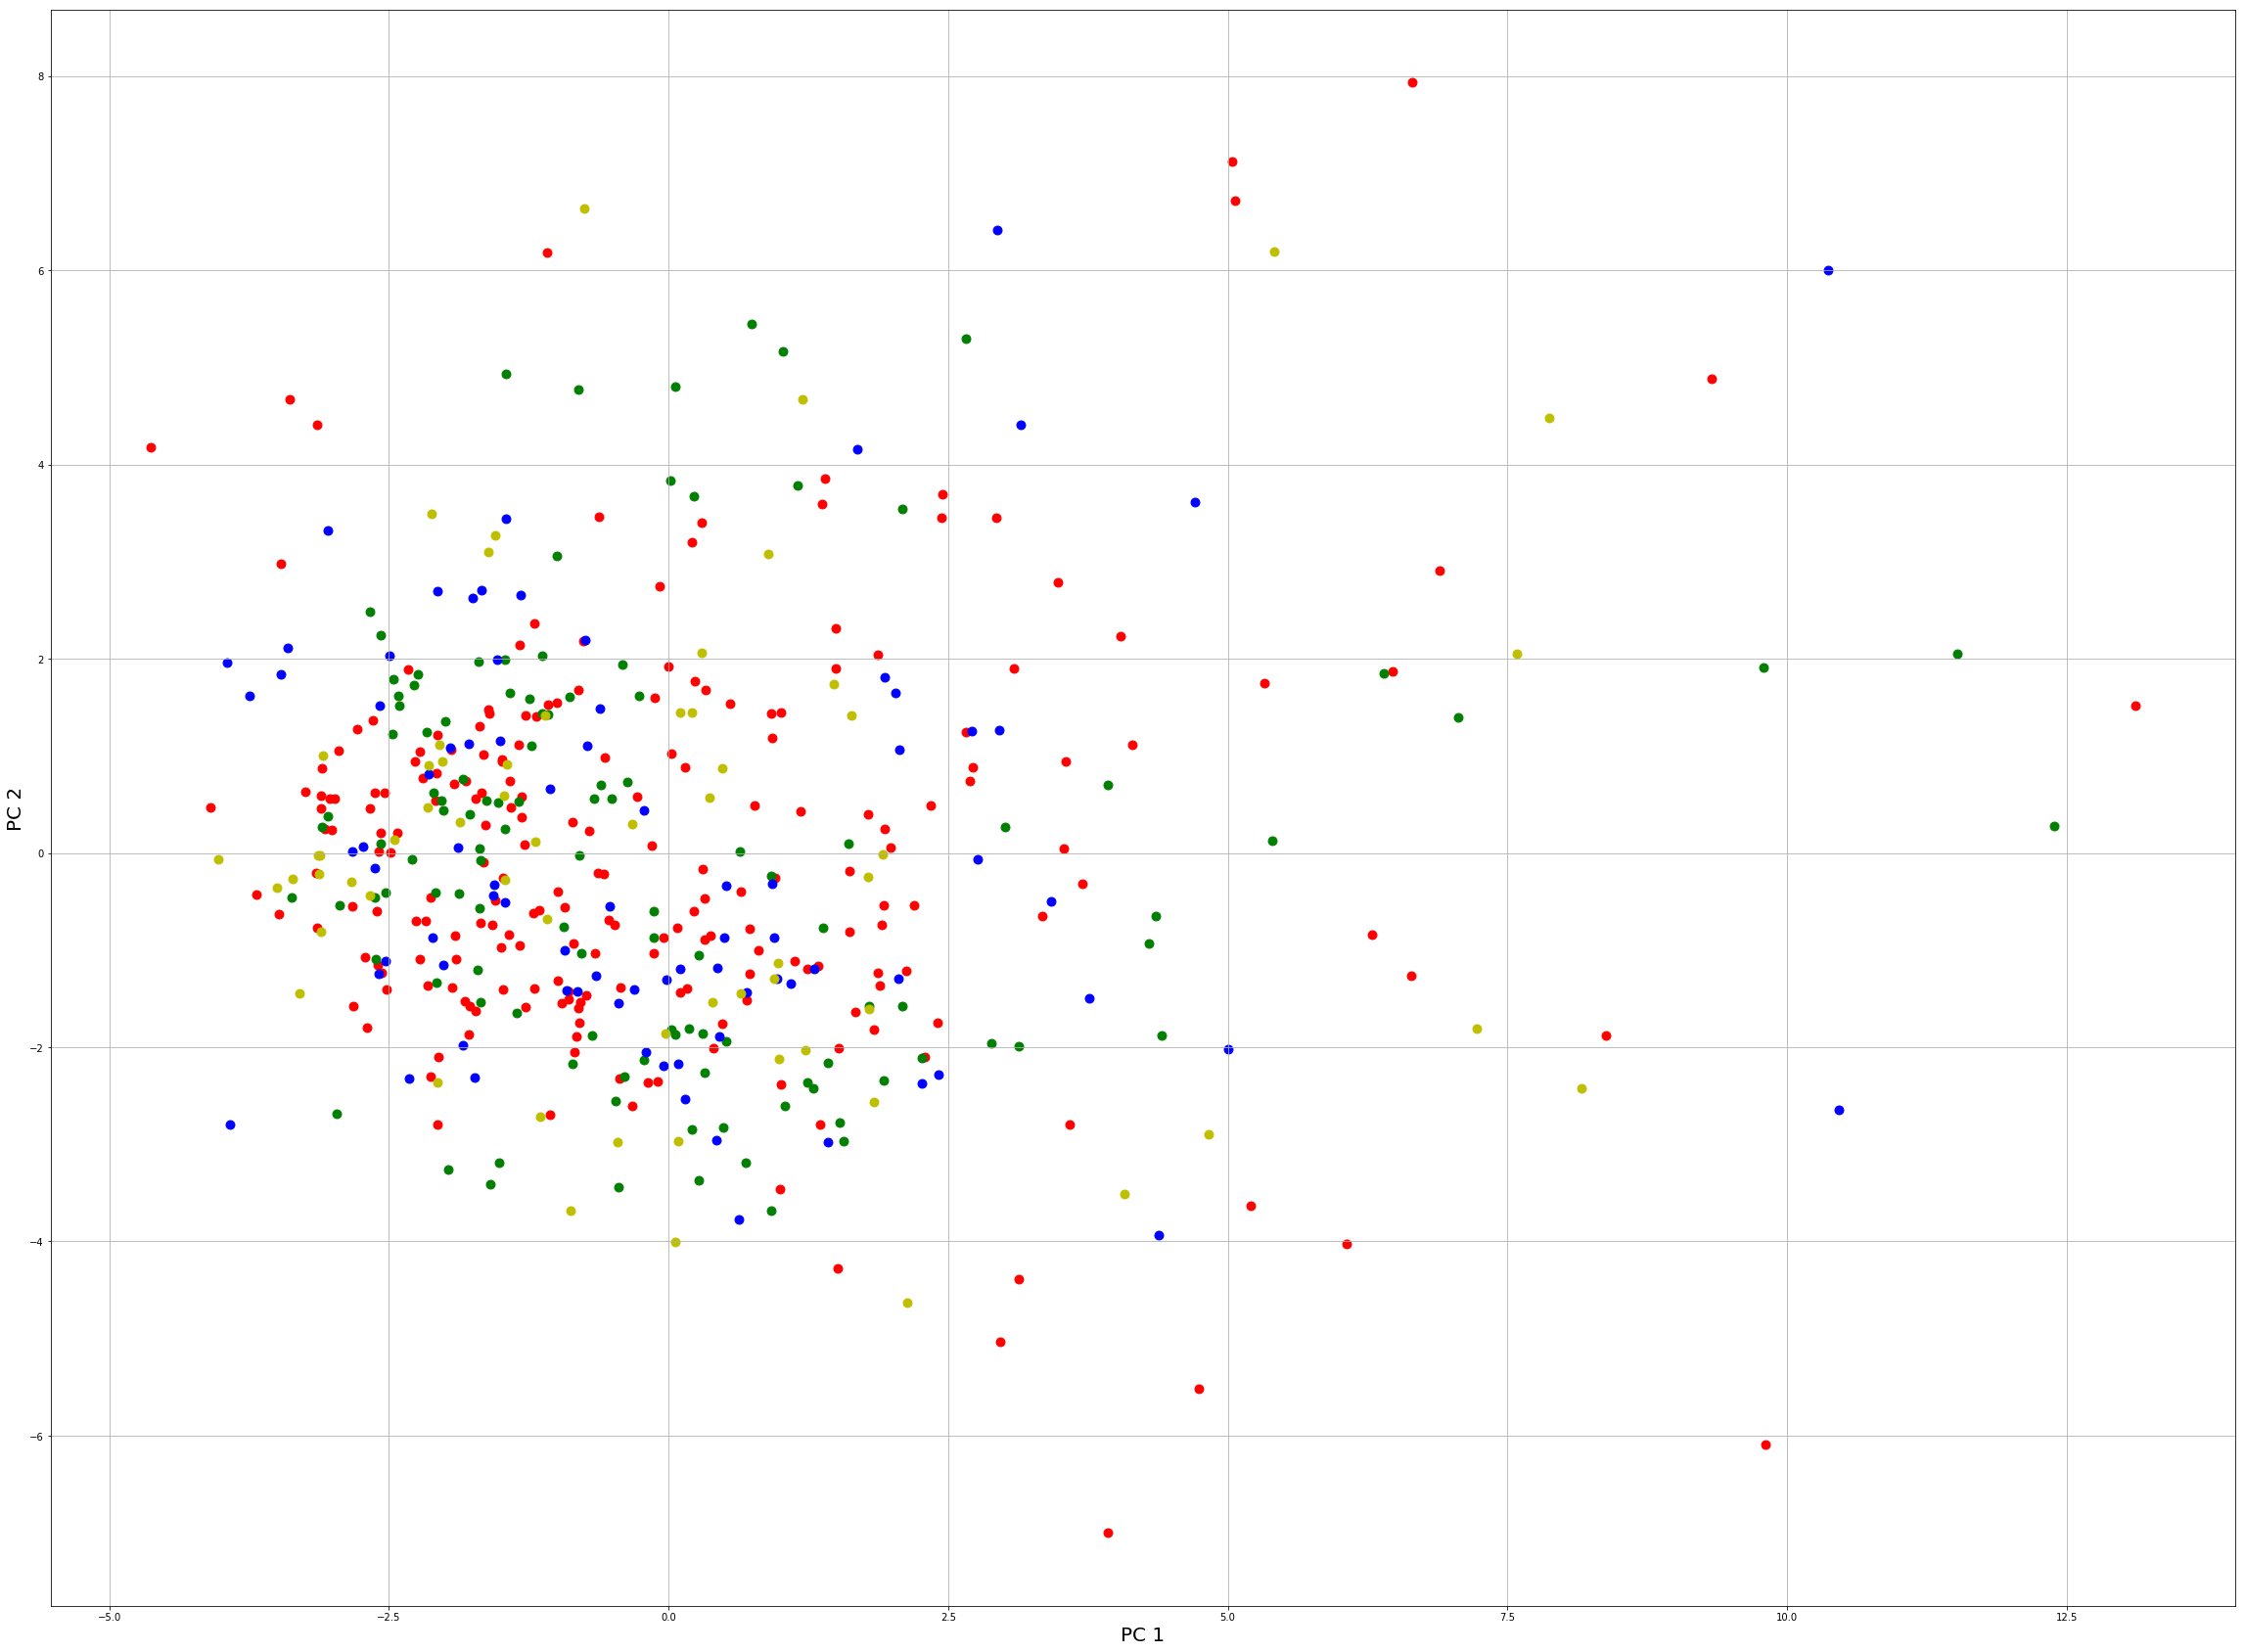

In [194]:
fig = plt.figure(figsize=(40,30))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC 1', fontsize = 20)
ax.set_ylabel('PC 2', fontsize = 20)
cohorts = ['excellent','good','medium','bad']
colour = ['r','g','b','y']
for c,m in zip(cohorts,colour):
    ax.scatter(tmp.loc[tmp['classified'] == c,'pc1']
                   , tmp.loc[tmp['classified'] == c,'pc2']
                   , c = m
                   , s = 80)
ax.grid()

In [130]:
from sklearn.cluster import KMeans

dataForClustering = tmp.drop(['classified','classified_code','pc3'],axis=1)

kmeans = KMeans(n_clusters=2)
kmeans.fit(dataForClustering)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [131]:
dataForClustering['classified'] = tmp['classified']
dataForClustering['classified_code'] = tmp['classified_code']
dataForClustering['clustered'] = kmeans.labels_

crosstab = pd.crosstab(dataForClustering.classified, dataForClustering.clustered, margins=True, normalize='index')
crosstab

clustered,0,1
classified,,
bad,0.758065,0.241935
excellent,0.760181,0.239819
good,0.794872,0.205128
medium,0.756098,0.243902
All,0.767635,0.232365


In [111]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
chi2_contingency(crosstab)

(0.09722472485231712,
 0.9999999999824184,
 12,
 array([[0.55186652, 0.28798214, 0.12685924, 0.0332921 ],
        [0.55186652, 0.28798214, 0.12685924, 0.0332921 ],
        [0.55186652, 0.28798214, 0.12685924, 0.0332921 ],
        [0.55186652, 0.28798214, 0.12685924, 0.0332921 ],
        [0.55186652, 0.28798214, 0.12685924, 0.0332921 ]]))

In [197]:
from sklearn.cluster import KMeans

dataForClustering = tmp.drop(['classified','classified_code'],axis=1)

#kmeans = KMeans(n_clusters=4)
#kmeans.fit(dataForClustering)
count = 1
for date, weeklyData in tmp.groupby(level=0):
    dataForClustering = weeklyData.drop(['classified','classified_code'],axis=1)
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(dataForClustering)
    
    dataForClustering['classified'] = weeklyData['classified']
    dataForClustering['classified_code'] = weeklyData['classified_code']
    dataForClustering['clustered'] = kmeans.labels_
    
    crosstab = pd.crosstab(dataForClustering.classified, dataForClustering.clustered, margins=True, normalize='index')
    print('Week' + str(count) + ': ' + str(date))
    print(crosstab)
    print('\n')
    count = count + 1

Week1: 2018-09-30 00:00:00
clustered          0         1
classified                    
bad         0.411765  0.588235
excellent   0.531250  0.468750
good        0.525000  0.475000
medium      0.500000  0.500000
All         0.504348  0.495652


Week2: 2018-10-07 00:00:00
clustered          0         1
classified                    
bad         0.705882  0.294118
excellent   0.636364  0.363636
good        0.657895  0.342105
medium      0.636364  0.363636
All         0.652893  0.347107


Week3: 2018-10-14 00:00:00
clustered          0         1
classified                    
bad         0.909091  0.090909
excellent   0.904762  0.095238
good        0.869565  0.130435
medium      0.800000  0.200000
All         0.894309  0.105691


Week4: 2018-10-21 00:00:00
clustered          0         1
classified                    
bad         0.764706  0.235294
excellent   0.780822  0.219178
good        0.937500  0.062500
medium      0.833333  0.166667
All         0.806452  0.193548




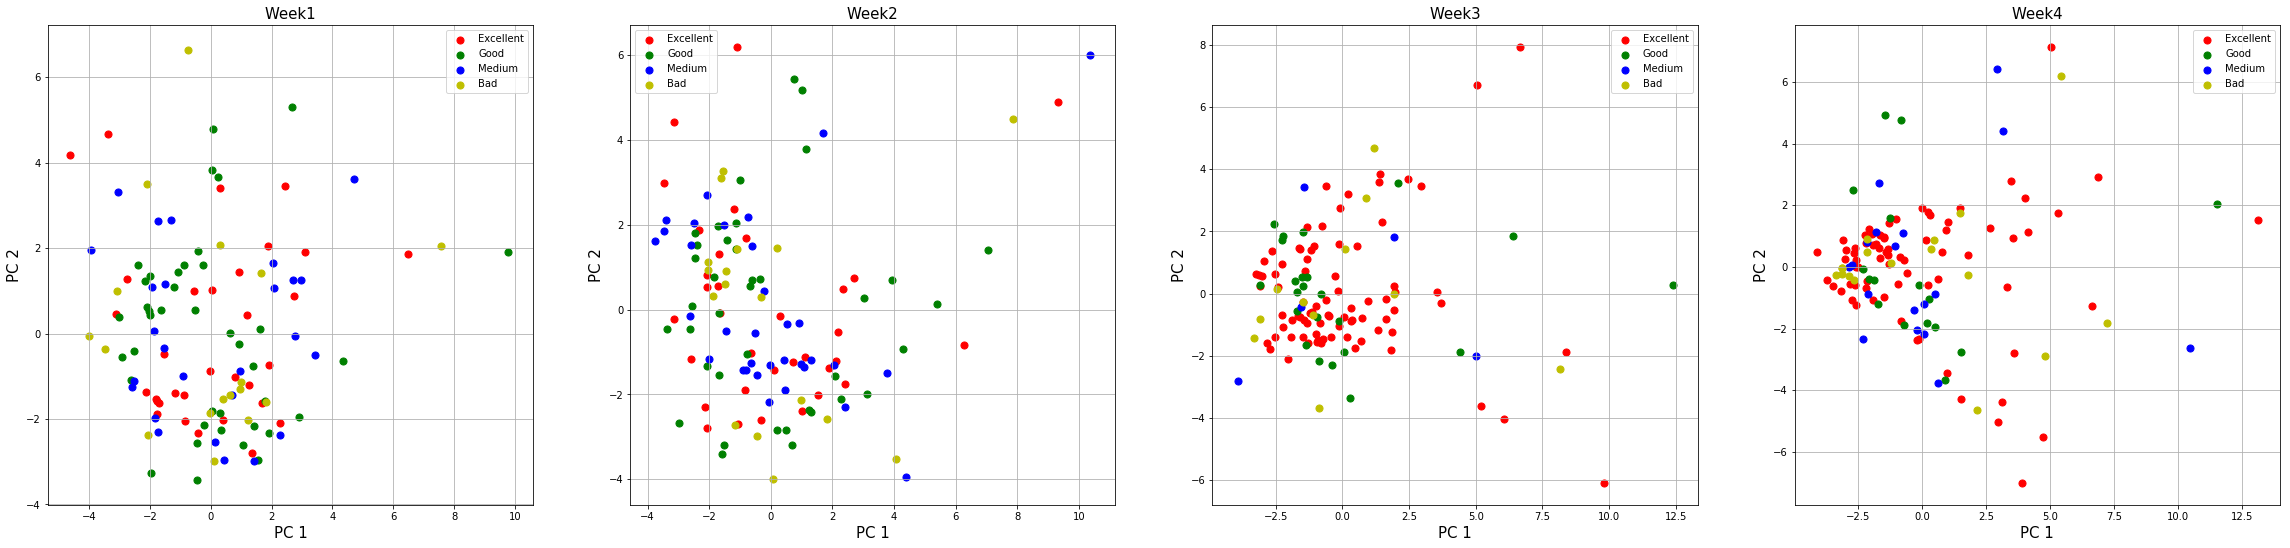

In [195]:
# 2D graph
#import seaborn as sns

#sns.set(rc={'figure.figsize':(50, 50)})
fig = plt.figure(figsize=(40,30))
#ax = fig.add_subplot(1,2,1, projection='3d')
#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
#ax.set_zlabel('Principal Component 3', fontsize = 15)
#ax.set_title('3 component PCA', fontsize = 20)

#for date, weeklyTransformedData in excellentCohort.groupby(level=0):
graph = []
countGraph = 0
for date, weeklyTransformedData in pcValueExcellentCohort.groupby(level=0):
    ax = fig.add_subplot(3,4,countGraph+1)
    graph.append(ax)
    graph[countGraph].set_xlabel('PC 1', fontsize = 15)
    graph[countGraph].set_ylabel('PC 2', fontsize = 15)
    graph[countGraph].scatter(weeklyTransformedData['pc1']
                       , weeklyTransformedData['pc2'] 
                       , c = 'r'
                       , s = 50)
    graph[countGraph].grid()
    countGraph = countGraph + 1

countGraph = 0
for date, weeklyTransformedData in pcValueGoodCohort.groupby(level=0):   
    #ax = fig.add_subplot(3,4,countGraph+1, projection='3d')
    graph[countGraph].scatter(weeklyTransformedData['pc1']
                   , weeklyTransformedData['pc2'] 
                   , c = 'g'
                   , s = 50)
    graph[countGraph].set_title('Week' + str(countGraph + 1),fontsize=15)
    countGraph = countGraph + 1

countGraph = 0
for date, weeklyTransformedData in pcValueMediumCohort.groupby(level=0):
    #ax = fig.add_subplot(3,4,countGraph, projection='3d')
    graph[countGraph].scatter(weeklyTransformedData['pc1']
                   , weeklyTransformedData['pc2'] 
                   , c = 'b'
                   , s = 50)
    countGraph = countGraph + 1

countGraph = 0
for date, weeklyTransformedData in pcValueBadCohort.groupby(level=0):
    #ax = fig.add_subplot(3,4,countGraph, projection='3d')
    graph[countGraph].scatter(weeklyTransformedData['pc1']
                   , weeklyTransformedData['pc2'] 
                   , c = 'y'
                   , s = 50)
    targets = ['Excellent', 'Good', 'Medium','Bad']
    graph[countGraph].legend(targets)
    countGraph = countGraph + 1


In [196]:
loadingsArrayExcellentCohort

explained_var_ratio  load-load  load-scroll  load-blur  \
date       pc                                                           
2018-09-30 1              0.199712  -0.133423     0.246120   0.350113   
           2              0.162834   0.044806     0.266471   0.075410   
           3              0.107667   0.104163     0.041510   0.229301   
2018-10-07 1              0.289232  -0.093243     0.286341   0.282151   
           2              0.195427   0.309398     0.174019  -0.224082   
           3              0.103836  -0.235175     0.132427  -0.143656   
2018-10-14 1              0.252301   0.111970     0.288618   0.179867   
           2              0.170263   0.222475    -0.186949  -0.355570   
           3              0.111177  -0.009020     0.011956  -0.092924   
2018-10-21 1              0.374028   0.081684     0.281148   0.206075   
           2              0.165158  -0.316396     0.145925   0.330773   
           3              0.089112   0.357614    -0.037003   0.046075   

               load-focus  load-unload  scroll-load  scroll-scroll  \
date       pc                                                        
2018-09-30 1    -0.352840     0.345322     0.144543      -0.069588   
           2     0.016953     0.083465     0.058597       0.330351   
           3    -0.207148     0.003603    -0.104309      -0.104361   
2018-10-07 1    -0.186886     0.261156     0.075760       0.250102   
           2     0.337055    -0.111879     0.318730       0.235294   
           3     0.083159    -0.029892     0.082656       0.069200   
2018-10-14 1     0.061076     0.148212     0.236228       0.211900   
           2     0.395769    -0.242906     0.166223       0.076525   
           3     0.060728    -0.204596     0.019123       0.093229   
2018-10-21 1     0.051014     0.181658     0.177238       0.245489   
           2    -0.388934     0.277395    -0.181304      -0.069565   
           3     0.098947     0.268711     0.178844      -0.214575   

               scroll-blur  scroll-focus  ...  focus-load  focus-scroll  \
date       pc                             ...                             
2018-09-30 1     -0.134310      0.046762  ...   -0.158479     -0.243120   
           2      0.408524      0.232062  ...    0.057412      0.359299   
           3      0.088403     -0.428820  ...   -0.204951      0.092683   
2018-10-07 1      0.306215      0.149537  ...   -0.088683      0.189415   
           2      0.160318      0.249456  ...    0.295621      0.173835   
           3      0.046669     -0.004157  ...   -0.182460     -0.080594   
2018-10-14 1      0.305043      0.168582  ...    0.146285      0.222809   
           2      0.157380      0.046627  ...    0.250765      0.299515   
           3     -0.030251      0.097365  ...    0.026621     -0.007036   
2018-10-21 1      0.295965      0.210058  ...    0.101102      0.253519   
           2     -0.058530     -0.176278  ...   -0.369361     -0.161013   
           3     -0.182226     -0.211777  ...    0.170250     -0.189088   

               focus-blur  focus-focus  focus-unload  unload-load  \
date       pc                                                       
2018-09-30 1    -0.272974     0.044739      0.156295     0.014597   
           2     0.299471    -0.052597      0.100021     0.246744   
           3     0.128099     0.156594     -0.196491     0.196081   
2018-10-07 1     0.097991    -0.050820      0.274476    -0.109096   
           2     0.168051     0.019588     -0.177260     0.210369   
           3    -0.104011     0.492903     -0.123603    -0.218963   
2018-10-14 1     0.235250     0.115954      0.251676     0.198902   
           2     0.271553    -0.107079     -0.073459     0.113685   
           3     0.135152     0.320749     -0.346866    -0.282019   
2018-10-21 1     0.268131     0.116465      0.263861     0.077412   
           2    -0.118862    -0.046811      0.091350    -0.073734   
           3    -0.091825     0.013773     -0.032521     0.4574